In [182]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from random import shuffle

In [183]:
import numpy as np

In [184]:
heart = np.load('heart-failure-prediction/etl_heart.npy')

In [185]:
shuffle(heart)

In [186]:
print(len(heart), len(heart[0]))

918 12


In [187]:
X = np.array(heart[:,:-1])
y = np.array(heart[:, -1])

In [188]:
y = to_categorical(y)

In [189]:
y[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [190]:
model = Sequential(
    [
        Dense(11, input_dim=11, activation='sigmoid'),
        Dense(2, activation='softmax')
    ]
)

In [191]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [192]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 24        
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


In [193]:
history = model.fit(X, y, epochs=50, verbose=0, validation_split=0.1)

In [194]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

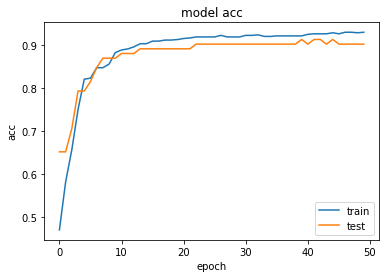

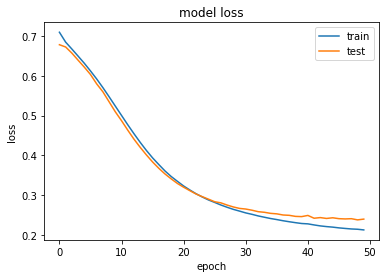

In [195]:
# summarize history for acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [196]:
print('Max val_acc achieved: ', max(history.history['val_acc'])*100, '%')
print('Max acc achieved: ', max(history.history['acc'])*100, '%')

Max val_acc achieved:  91.30434989929199 %
Max acc achieved:  92.97820925712585 %
